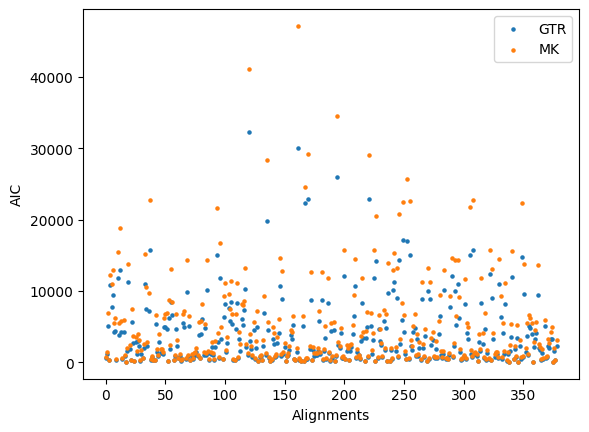

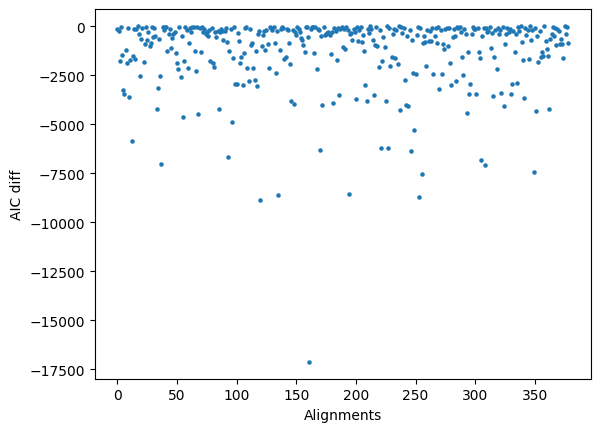

In [13]:
import matplotlib.pyplot as plt


def get_score_from_string(s, score):
    data = s.split(",")
    if score == "AIC":
        return float(data[0])
    elif score == "cAIC":
        return float(data[1])
    elif score == "BIC":
        return float(data[2])
    else:
        print(score + " does not exist!")
        return None
    
def readAICScores(score):
    lines = open("temp/aic.scores", "r").read().split("\n")[1:-1]
    score_dict = {}
    for line in lines:
        data = line.split('|')
        name = data[0]
        mini_dict = {}
        mini_dict["GTR"] = get_score_from_string(data[1], score)
        mini_dict["MK"] = get_score_from_string(data[2], score)
        mini_dict["BIN"] = get_score_from_string(data[3], score)
        score_dict[name] = mini_dict
    return score_dict

def read_avg_col_states():
    avg_col_states = {}
    lines = open("temp/avg_col_states.csv", "r").read().split("\n")[1:-1]
    for line in lines:
        data = line.split(",")
        avg_col_states[data[0]] = float(data[1])
    return avg_col_states

def plot_scores():
    avg_col_states = read_avg_col_states()
    score_dict = readAICScores("AIC")
    GTR_scores = [scores["GTR"] for name,scores in score_dict.items()]
    MK_scores = [scores["MK"] for name,scores in score_dict.items()]
    BIN_scores = [scores["BIN"] for name,scores in score_dict.items()]
    avg_col_states_dict = read_avg_col_states()
    avg_col_states = [avg_col_states_dict[name+ ".phy"] for name,scores in score_dict.items()]
    
    plt.scatter(range(len(GTR_scores)), GTR_scores, label="GTR", s=5)
    plt.scatter(range(len(MK_scores)), MK_scores, label="MK", s=5)
    #plt.scatter(range(len(BIN_scores)), BIN_scores, label="BIN", s=5)
    plt.legend()
    plt.xlabel("Alignments")
    plt.ylabel("AIC")
    plt.show()
    
 
    plt.scatter(range(len(GTR_scores)), [GTR_scores[i] - MK_scores[i] for i in range(len(GTR_scores))], s=5)
    #plt.scatter(avg_col_states, [GTR_scores[i] - MK_scores[i] for i in range(len(GTR_scores))], s=5)
    plt.xlabel("Alignments")
    plt.ylabel("AIC diff")
    plt.show()
    
plot_scores()